In [2]:
%matplotlib inline

In [84]:
import os
import numpy as np
import string
import matplotlib as mpl
from matplotlib import pyplot as plt
import graph_tool as gt
from fixtures import house_graph
from graph_helpers import sort_pair, get_kcore
from graph_tool.draw import graph_draw, sfdp_layout
from edge_dag import get_edge_dag

from viz_helpers import *

In [20]:
np.random.seed(42)
gt.seed_rng(42)

In [142]:
A2Z = string.ascii_lowercase[:26]

In [173]:
if True:
    original_g = house_graph()
    cand_edges = [(2, 5), (0, 5), (0, 4), (1, 4), (0, 3)]
    pos = house_pos(original_g)
    name = 'house'
else:
    original_g = gt.Graph(directed=False)
    original_g.add_vertex(7)
    original_g.add_edge_list([
        (0, 1), (1, 2), (0, 2),
        (0, 3), (1, 4)
    ])
    cand_edges = [(3, 4), (3, 5), (4, 6), (5, 6), (4, 5), (3, 6), 
                  (2, 5)]
    
    pos = example1_pos(original_g)
    
    name = 'example1'

fig_dirname = 'figs/illustration-{}/'.format(name)
if not os.path.exists(fig_dirname):
    os.makedirs(fig_dirname)    

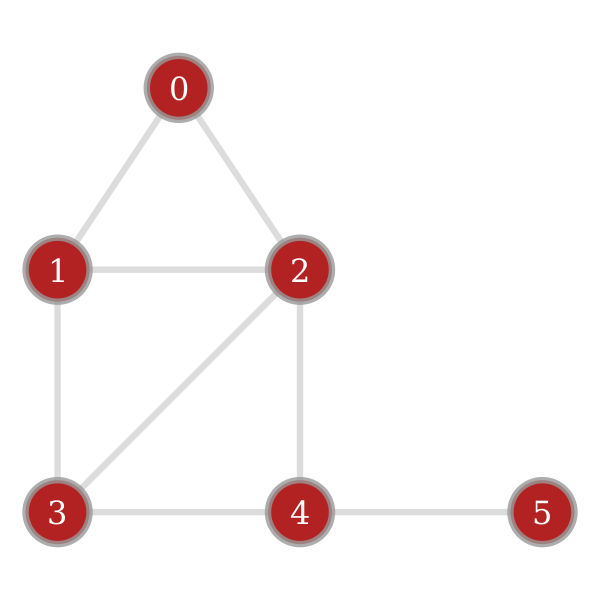

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f7c37a19cf8, at 0x7f7c37913c50>

In [174]:
# plt.switch_backend('cairo')
g = original_g.copy()
s = default_setting(g)

graph_draw(g, pos, **s, output='{}/input.pdf'.format(fig_dirname, name))


In [175]:
e2letter = dict(zip(cand_edges, A2Z))

def edge_dag_nx2gt(edge_dag):
    node2id = {n: i for i, n in enumerate(edge_dag.nodes_iter())}
    edg = gt.Graph(directed=True)
    edg.add_vertex(edge_dag.number_of_nodes())
    for u, v in edge_dag.edges_iter():
        edg.add_edge(node2id[u], node2id[v])
    return edg

In [176]:

meta_node_pos_dict = {
    'a': (0, 0),
    'b': (1, 0), 
    'c': (2, 0),
    'd': (1, 1), 
    'e,f': (1, 2),
    'g': (3, 2)
}

0it [00:00, ?it/s]

adding (2, 5) promotes [5]
new meta node: ((2, 5),)
parent meta nodes set()


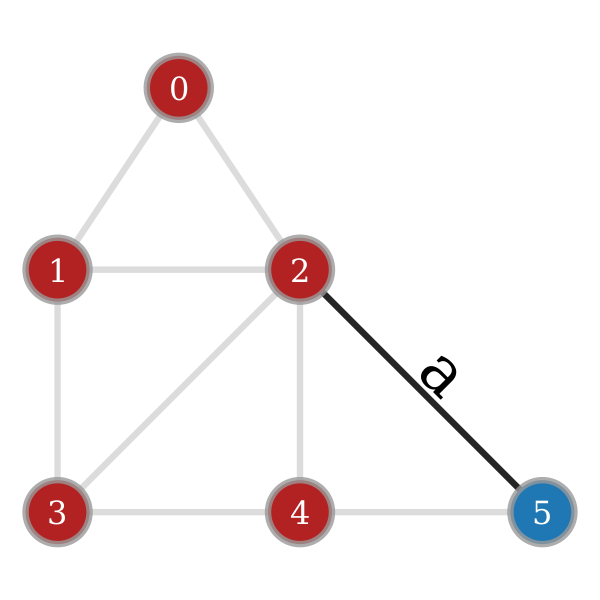

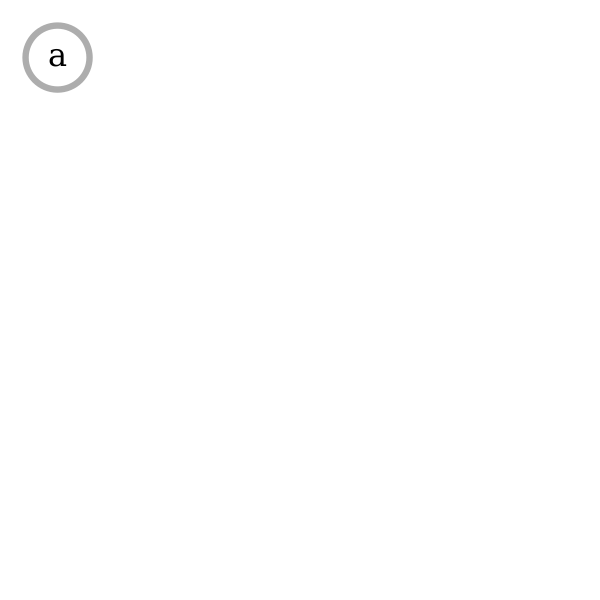

1it [00:00,  8.09it/s]

----------
adding (0, 5) promotes [0, 1, 2, 3, 4, 5]
new meta node: ((0, 5),)
parent meta nodes {((2, 5),)}


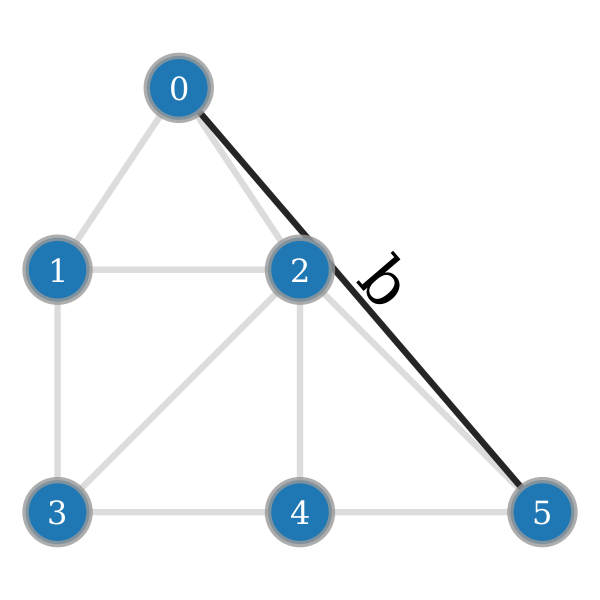

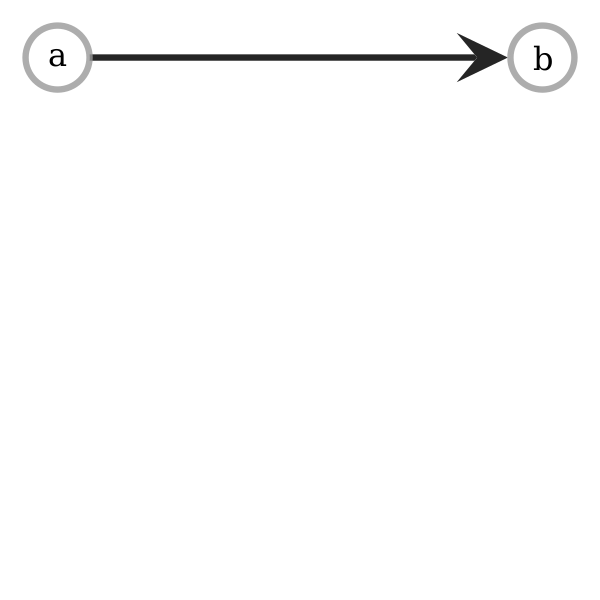

2it [00:00,  8.29it/s]

----------
adding (0, 4) promotes nothing


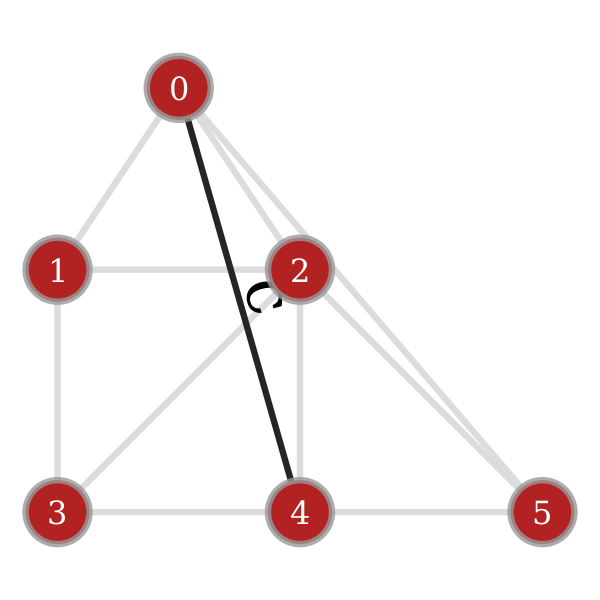

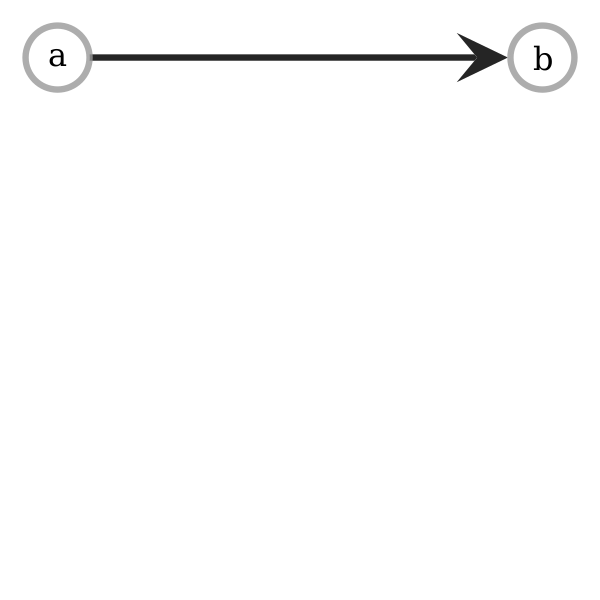

3it [00:00,  8.45it/s]

----------
adding (1, 4) promotes nothing


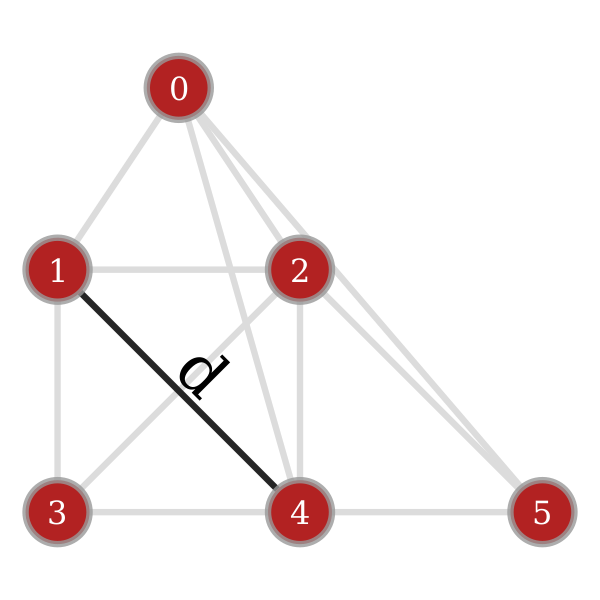

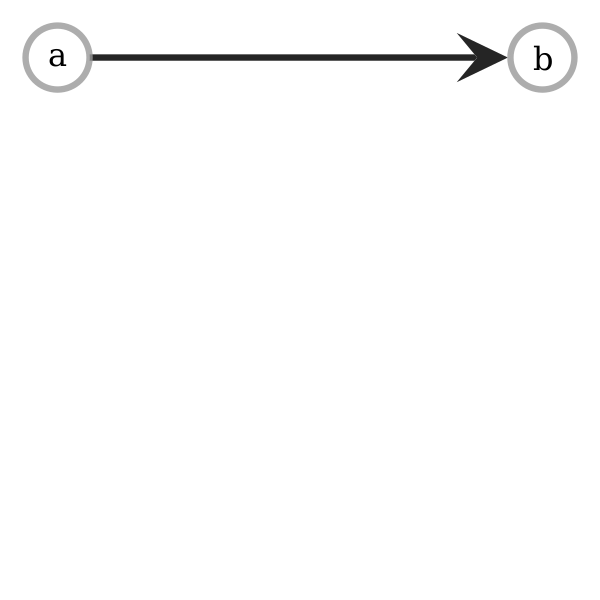

4it [00:00,  8.57it/s]

----------
adding (0, 3) promotes [0, 1, 2, 3, 4]
new meta node: ((0, 3), (1, 4), (0, 4))
parent meta nodes set()


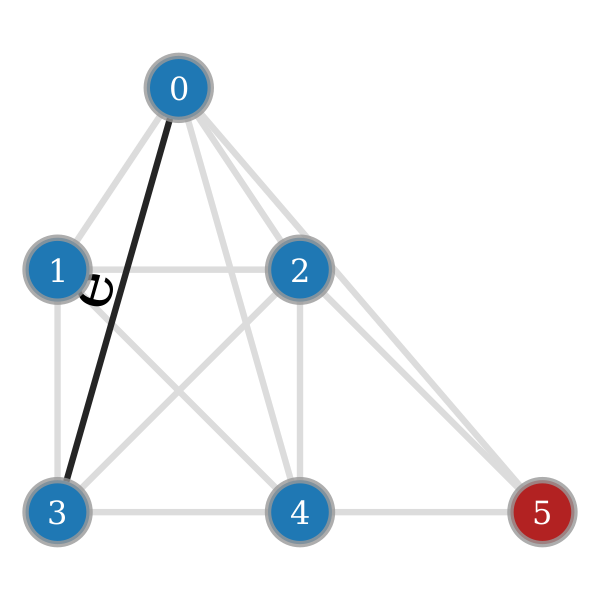

KeyError: 'c,d,e'

In [178]:
def callback(g, i, edge, affected_nodes, new_core_num, edge_dag):
    if True:
        s = core_update_setting(g, edge, affected_nodes, new_core_num, edge_short_name=A2Z[i])        
        graph_draw(g, pos, **s, output='{}/iter-{}.pdf'.format(fig_dirname, i))
        
    if True:
        edg = edge_dag_nx2gt(edge_dag)
        id2node = {i: n for i, n in enumerate(edge_dag.nodes_iter())}
        s = default_setting(edg)
        meta_pos = g.new_vertex_property('vector<float>')        
        for v in edg.vertices():
            edges = id2node[int(v)]
            l = ','.join(sorted([e2letter[e] for e in edges]))
            s['vertex_text'][v] = l
            meta_pos[v] = meta_node_pos_dict[l]
        s['edge_color'] = COLOR_BLACK
        s['vertex_fill_color'].set_value((1, 1, 1, 1))
        graph_draw(edg, meta_pos, **s, output='{}/edge-dag-{}.pdf'.format(fig_dirname, i)) 

get_edge_dag(original_g, cand_edges, iter_callback=callback)